In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style = "ticks", color_codes = True)

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [3]:
from IPython.display import display

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [4]:
import ipywidgets as widgets
from IPython.display import display

output = widgets.Output()
display(output)

with output:
    # Large output inside a scrollable box
    for i in range(100):
        print(f"Line {i}")
    
output.layout.max_height = '50px'
output.layout.overflow = 'auto'

Output()

## Load the Data

In [5]:
sold = pd.read_csv('../data/CafeSellMetaData.csv')
transactions = pd.read_csv('../data/CafeTransactionStore.csv')
date_info = pd.read_csv('../data/CafeDateInfo.csv')

In [6]:
sold.head()

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME
0,1070,0,7821,BURGER
1,3055,0,3052,COFFEE
2,3067,0,5030,COKE
3,3028,0,6249,LEMONADE
4,2051,2,7821,BURGER


In [7]:
sold.describe()
sold.describe(include=['O'])

,SELL_ID,SELL_CATEGORY,ITEM_ID
count,11.000000,11.000000,11.000000
mean,2235.000000,1.272727,5906.909091
std,598.728653,1.009050,1830.217170
min,1070.000000,0.000000,3052.000000
25%,2051.500000,0.000000,5030.000000
50%,2053.000000,2.000000,6249.000000
75%,2540.500000,2.000000,7821.000000
max,3067.000000,2.000000,7821.000000


,ITEM_NAME
count,11
unique,4
top,BURGER
freq,4


In [8]:
sold[sold.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_ID,ITEM_NAME


- SELL_ID: a categorical variable, identifier of the combination of items that is contained in the product.
- SELL_CATEGORY: "0" identifies single products; the category "2" identifies the combo ones.
- ITEM_ID: a categorical variable, identifier of the item that is contained in the product.
- ITEM_NAME: a categorical variable, identifying the name of the item.

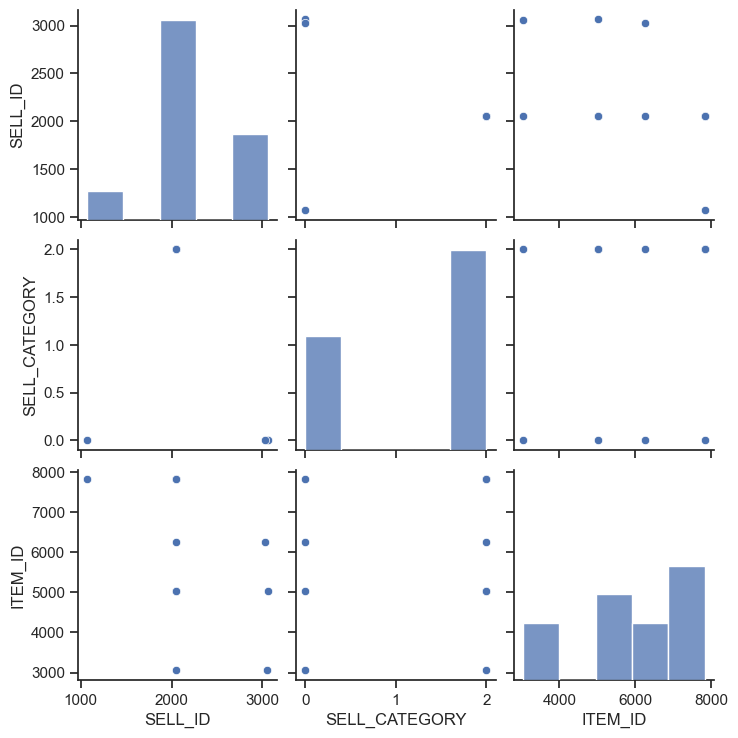

In [9]:
sns.pairplot(sold)

In [10]:
transactions.head()

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
0,01/01/12,15.50,46,1070,0
1,01/01/12,12.73,22,2051,2
2,01/01/12,12.75,18,2052,2
3,01/01/12,12.60,30,2053,2
4,01/02/12,15.50,70,1070,0


In [11]:
transactions.describe()
transactions.describe(include=['O'])

,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY
count,5404.000000,5404.000000,5404.00000,5404.000000
mean,12.868729,44.335307,1806.50000,1.500000
std,1.563922,25.502597,425.25841,0.866106
min,10.120000,8.000000,1070.00000,0.000000
25%,11.530000,24.000000,1805.75000,1.500000
50%,12.640000,36.000000,2051.50000,2.000000
75%,13.557500,60.000000,2052.25000,2.000000
max,16.500000,124.000000,2053.00000,2.000000


,CALENDAR_DATE
count,5404
unique,1348
top,03/01/13
freq,16


In [12]:
transactions[transactions.isnull().any(axis=1)]

,CALENDAR_DATE,PRICE,QUANTITY,SELL_ID,SELL_CATEGORY


- Important: It's supposed the PRICE for that product in the day will not vary.
- In detials: CALENDAR_DATE: a date/time variable, having the time always set to 00:00 AM.
- PRICE: a numeric variable, associated witht the price of the product identified by the SELL_ID.
- QUANTITY: A numeric variable, associated witht the quantity of the product sold, identified by the SELL_ID.
- SELL_ID: a categorical variable, identifier of the product sold.
- SELL_CATEGORY: acategorical variabl, category of the product sold.

(array([ 360.,  509.,  629., 1351., 1082.,  122.,  389.,  240.,  482.,
         240.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <BarContainer object of 10 artists>)

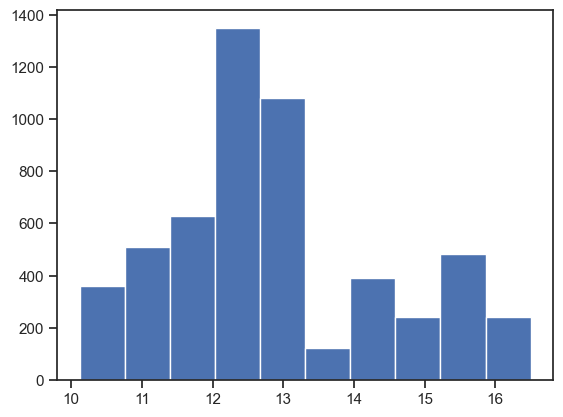

In [13]:
plt.hist(transactions.PRICE)

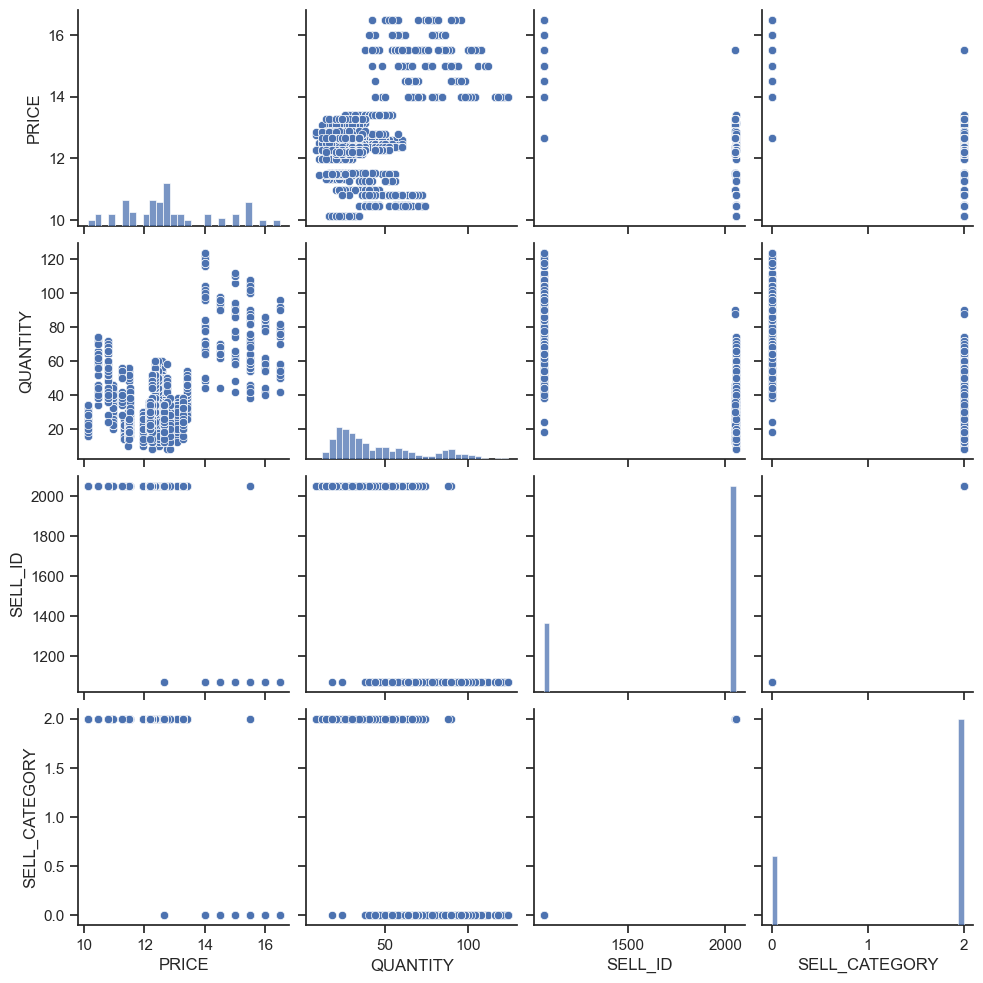

In [14]:
sns.pairplot(transactions)

In [15]:
date_info.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,NaN,0,0,32.0,1
4,1/5/12,2012,NaN,0,0,24.8,0


In [16]:
date_info.describe()
date_info.describe(include=['O'])

,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,2013.375093,0.285397,0.204596,56.326019,0.862120
std,1.073073,0.451771,0.403556,20.227597,0.344902
min,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2013.000000,0.000000,0.000000,60.800000,1.000000
75%,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2015.000000,1.000000,1.000000,87.800000,1.000000


,CALENDAR_DATE,HOLIDAY
count,1349,105
unique,1348,8
top,3/1/13,Luner New Year
freq,2,28


In [17]:
date_info.dtypes

CALENDAR_DATE           object
YEAR                     int64
HOLIDAY                 object
IS_WEEKEND               int64
IS_SCHOOLBREAK           int64
AVERAGE_TEMPERATURE    float64
IS_OUTDOOR               int64
dtype: object

In [18]:
date_info[date_info.isnull().any(axis=1)].count()

CALENDAR_DATE          1244
YEAR                   1244
HOLIDAY                   0
IS_WEEKEND             1244
IS_SCHOOLBREAK         1244
AVERAGE_TEMPERATURE    1244
IS_OUTDOOR             1244
dtype: int64

In [19]:
date_info['HOLIDAY']=date_info['HOLIDAY'].fillna('No Holiday')

In [20]:
date_info.head()

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1/1/12,2012,New Year,1,0,24.8,0
1,1/2/12,2012,New Year,0,0,24.8,0
2,1/3/12,2012,New Year,0,0,32.0,1
3,1/4/12,2012,No Holiday,0,0,32.0,1
4,1/5/12,2012,No Holiday,0,0,24.8,0


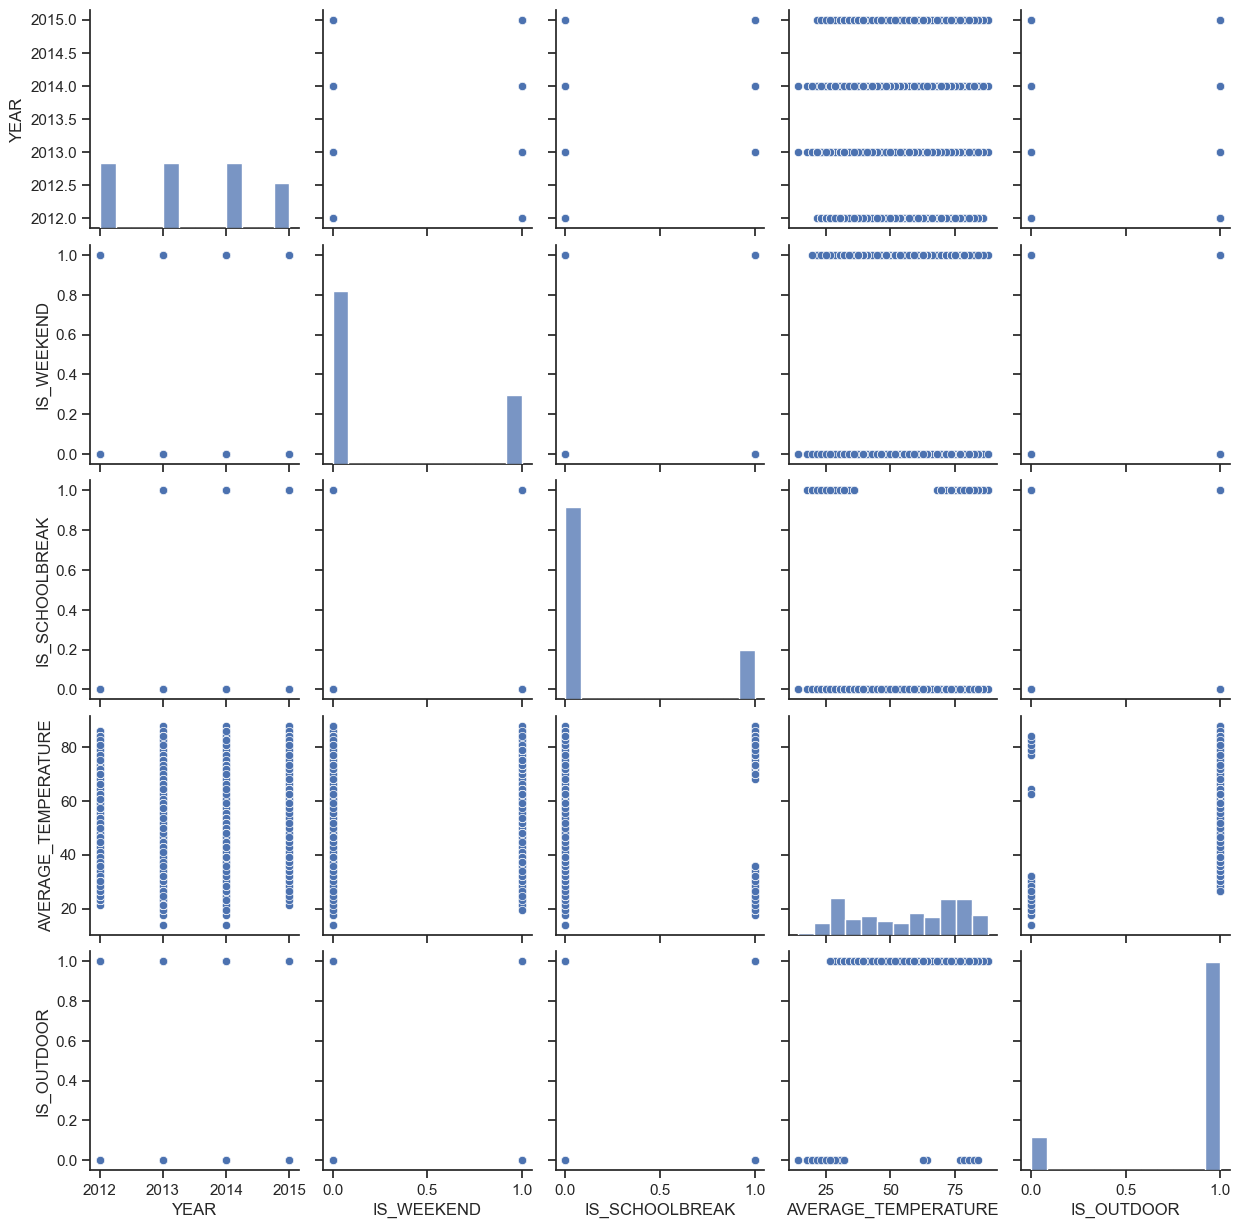

In [21]:
sns.pairplot(date_info)

# Understanding the data better

In [22]:
np.unique(date_info['HOLIDAY'])

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'National Day', 'New Year', 'No Holiday',
       'Qing Ming Festival', 'WWII Celebration'], dtype=object)

In [23]:
date_info['CALENDAR_DATE'].min()

'1/1/12'

In [24]:
date_info.CALENDAR_DATE.max()

'9/9/15'

In [25]:
date_info.shape

(1349, 7)

In [26]:
date_info[date_info.isnull().any(axis=1)]

,CALENDAR_DATE,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [27]:
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1)

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
0,1070,True,False,False,False
1,3055,False,True,False,False
2,3067,False,False,True,False
3,3028,False,False,False,True
4,2051,True,False,False,False
5,2051,False,False,True,False
6,2052,True,False,False,False
7,2052,False,False,False,True
8,2053,True,False,False,False
9,2053,False,False,True,False


In [28]:
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1).groupby(sold.SELL_ID).sum()

,SELL_ID,BURGER,COFFEE,COKE,LEMONADE
SELL_ID,,,,,
1070,1070,1,0,0,0
2051,4102,1,0,1,0
2052,4104,1,0,0,1
2053,6159,1,1,1,0
3028,3028,0,0,0,1
3055,3055,0,1,0,0
3067,3067,0,0,1,0


In [29]:
data1 = pd.merge(sold.drop(['ITEM_ID'], axis=1), transactions.drop(['SELL_CATEGORY'], axis=1), on='SELL_ID')
data1.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/02/12,15.5,70
2,1070,0,BURGER,01/03/12,15.5,62
3,1070,0,BURGER,01/04/12,15.5,88
4,1070,0,BURGER,01/05/12,15.5,104


In [30]:
b = data1.groupby(['SELL_ID', 'SELL_CATEGORY', 'ITEM_NAME', 'CALENDAR_DATE', 'PRICE']).QUANTITY.sum()

In [32]:
b.head()

SELL_ID  SELL_CATEGORY  ITEM_NAME  CALENDAR_DATE  PRICE
1070     0              BURGER     01/01/12       15.5     46
                                   01/01/13       15.5     60
                                   01/01/14       15.5     72
                                   01/01/15       14.0     66
                                   01/02/12       15.5     70
Name: QUANTITY, dtype: int64

In [33]:
data1.shape
intermediate_data = b.reset_index()

(10808, 6)

In [34]:
b.shape

(10792,)

In [35]:
intermediate_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY
0,1070,0,BURGER,01/01/12,15.5,46
1,1070,0,BURGER,01/01/13,15.5,60
2,1070,0,BURGER,01/01/14,15.5,72
3,1070,0,BURGER,01/01/15,14.0,66
4,1070,0,BURGER,01/02/12,15.5,70


In [36]:
intermediate_data['CALENDAR_DATE'].min()

'01/01/12'

In [38]:
intermediate_data['CALENDAR_DATE'].max()

'9/30/14'

In [39]:
combined_data = pd.merge(intermediate_data, date_info, on = 'CALENDAR_DATE')
combined_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No Holiday,0,0,26.6,0
1,1070,0,BURGER,1/13/13,15.5,70,2013,No Holiday,1,0,30.2,0
2,1070,0,BURGER,1/13/14,15.5,104,2014,No Holiday,0,0,28.4,0
3,1070,0,BURGER,1/13/15,14.0,116,2015,No Holiday,0,0,28.4,0
4,1070,0,BURGER,1/14/12,15.5,74,2012,No Holiday,1,0,23.0,0


In [42]:
combined_data.shape

(6696, 12)

In [43]:
combined_data[combined_data.isnull().any(axis=1)]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [44]:
np.unique(combined_data['HOLIDAY'])
np.unique(combined_data['IS_WEEKEND'])
np.unique(combined_data['IS_SCHOOLBREAK'])

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'No Holiday'], dtype=object)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

In [46]:
bau_data = combined_data[(combined_data.HOLIDAY=='No Holiday') & (combined_data.IS_SCHOOLBREAK==0) & (combined_data.IS_WEEKEND==0)] # bau = businesss as usual

In [47]:
bau_data.head()

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No Holiday,0,0,26.6,0
2,1070,0,BURGER,1/13/14,15.5,104,2014,No Holiday,0,0,28.4,0
3,1070,0,BURGER,1/13/15,14.0,116,2015,No Holiday,0,0,28.4,0
6,1070,0,BURGER,1/14/14,15.5,86,2014,No Holiday,0,0,28.4,1
7,1070,0,BURGER,1/14/15,14.0,122,2015,No Holiday,0,0,30.2,0


In [48]:
bau_data.shape

(3768, 12)

In [49]:
np.unique(bau_data.HOLIDAY)
np.unique(bau_data.IS_WEEKEND)
np.unique(bau_data.IS_SCHOOLBREAK)

array(['No Holiday'], dtype=object)

array([0], dtype=int64)

array([0], dtype=int64)

In [50]:
bau_data[bau_data.IS_WEEKEND == 1]

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


In [52]:
bau_data[bau_data.HOLIDAY != 'No Holiday']

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR


(array([1884.,    0.,    0.,  942.,    0.,    0.,  471.,    0.,    0.,
         471.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

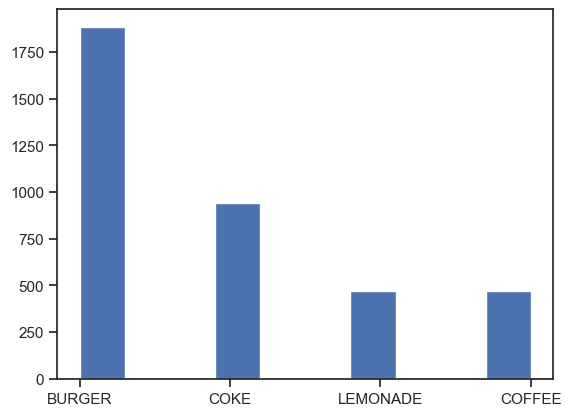

In [53]:
 plt.hist(bau_data.ITEM_NAME)

(array([ 411.,  388.,  441., 1159.,  790.,  108.,  122.,  111.,  174.,
          64.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <BarContainer object of 10 artists>)

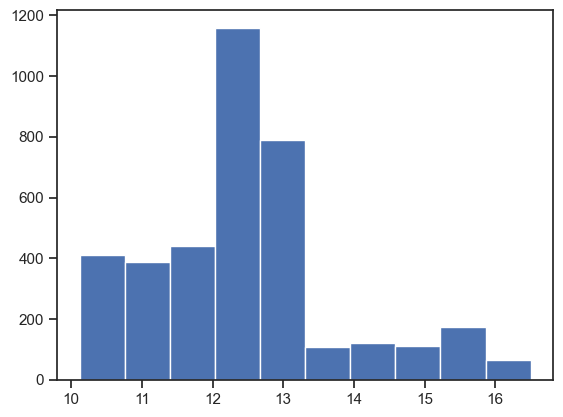

In [54]:
plt.hist(bau_data.PRICE)

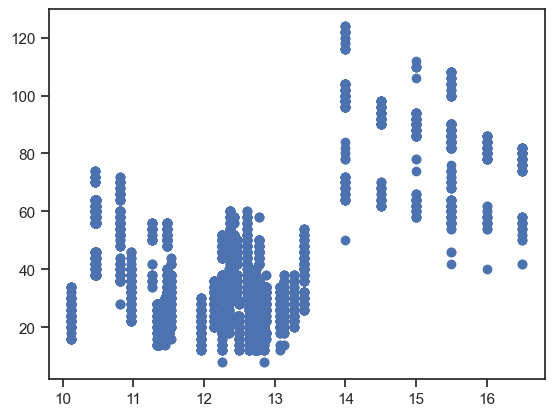

In [55]:
plt.scatter(combined_data.PRICE, combined_data.QUANTITY)

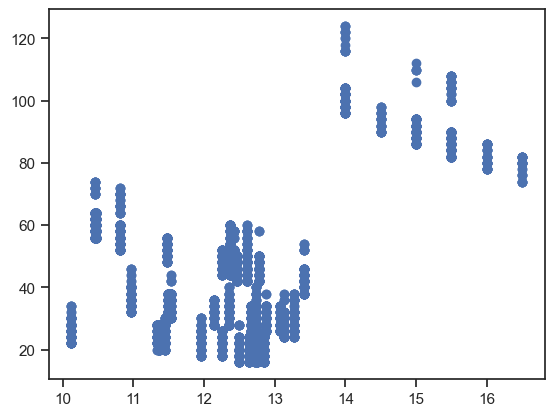

In [56]:
plt.scatter(bau_data.PRICE, bau_data.QUANTITY)

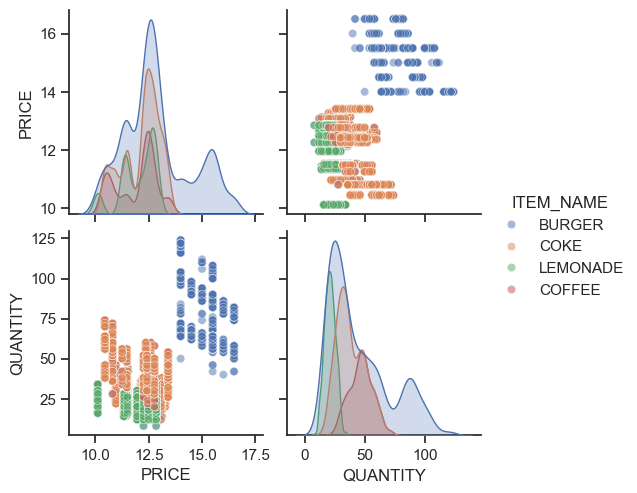

In [60]:
sns.pairplot(combined_data[['PRICE', 'QUANTITY', 'ITEM_NAME']], hue='ITEM_NAME', plot_kws={'alpha':0.5})

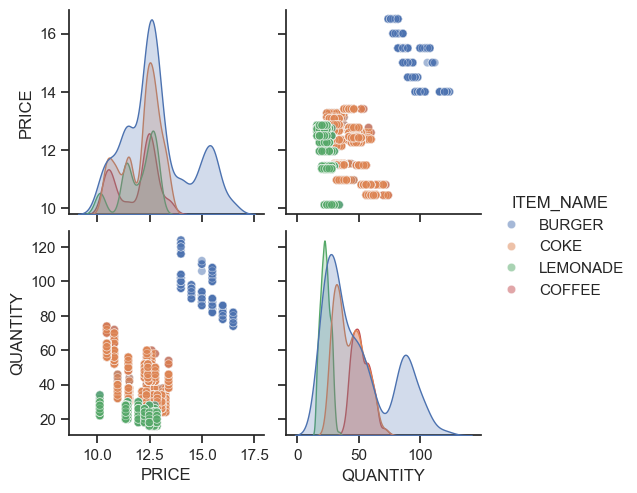

In [61]:
sns.pairplot(bau_data[['PRICE', 'QUANTITY', 'ITEM_NAME']], hue='ITEM_NAME', plot_kws={'alpha':0.5})

The price density plot is bimodal. From the graph we can see that for all quantities, as the price is increased the quantity sold is decreased. Although coke is hidden in htis view. We xan go ahead and calculate the price elasticities for this.

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No Holiday,0,0,26.6,0
1,1070,0,BURGER,1/13/13,15.5,70,2013,No Holiday,1,0,30.2,0
2,1070,0,BURGER,1/13/14,15.5,104,2014,No Holiday,0,0,28.4,0
3,1070,0,BURGER,1/13/15,14.0,116,2015,No Holiday,0,0,28.4,0
4,1070,0,BURGER,1/14/12,15.5,74,2012,No Holiday,1,0,23.0,0


(3348, 12)

,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000
mean,1806.500000,1.500000,12.858572,44.974313,2013.351254,0.284349,0.200717,56.255914,0.878136
std,425.282579,0.866155,1.565046,25.747886,1.062567,0.451171,0.400596,19.996348,0.327177
min,1070.000000,0.000000,10.120000,8.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,1805.750000,1.500000,11.530000,24.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,2051.500000,2.000000,12.640000,36.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,2052.250000,2.000000,13.557500,60.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,2053.000000,2.000000,16.500000,124.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

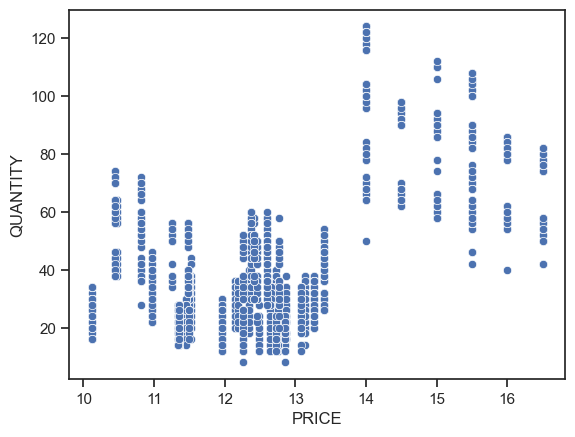

In [63]:
burger = combined_data[combined_data.ITEM_NAME=='BURGER']
burger.head()
burger.shape
burger.describe()
sns.scatterplot(x=burger.PRICE, y=burger.QUANTITY)

<Axes: xlabel='PRICE', ylabel='QUANTITY'>

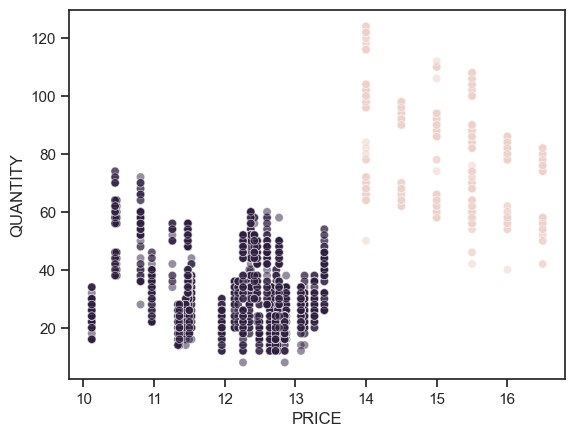

In [64]:
burger=combined_data[combined_data.ITEM_NAME=='BURGER']
sns.scatterplot(data=burger, x=burger.PRICE, y=burger.QUANTITY, hue='SELL_ID', legend=False, alpha=0.5)

In [65]:
np.unique(combined_data.SELL_ID)

array([1070, 2051, 2052, 2053], dtype=int64)

In [66]:
np.unique(combined_data.SELL_CATEGORY)

array([0, 2], dtype=int64)

,SELL_ID,SELL_CATEGORY,ITEM_NAME,CALENDAR_DATE,PRICE,QUANTITY,YEAR,HOLIDAY,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
0,1070,0,BURGER,1/13/12,15.5,100,2012,No Holiday,0,0,26.6,0
1,1070,0,BURGER,1/13/13,15.5,70,2013,No Holiday,1,0,30.2,0
2,1070,0,BURGER,1/13/14,15.5,104,2014,No Holiday,0,0,28.4,0
3,1070,0,BURGER,1/13/15,14.0,116,2015,No Holiday,0,0,28.4,0
4,1070,0,BURGER,1/14/12,15.5,74,2012,No Holiday,1,0,23.0,0


,SELL_ID,SELL_CATEGORY,PRICE,QUANTITY,YEAR,IS_WEEKEND,IS_SCHOOLBREAK,AVERAGE_TEMPERATURE,IS_OUTDOOR
count,837.0,837.0,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,1070.0,0.0,15.154719,82.685783,2013.351254,0.284349,0.200717,56.255914,0.878136
std,0.0,0.0,0.744770,15.981238,1.063043,0.451373,0.400776,20.005316,0.327324
min,1070.0,0.0,14.000000,40.000000,2012.000000,0.000000,0.000000,14.000000,0.000000
25%,1070.0,0.0,14.500000,68.000000,2012.000000,0.000000,0.000000,35.600000,1.000000
50%,1070.0,0.0,15.500000,86.000000,2013.000000,0.000000,0.000000,59.000000,1.000000
75%,1070.0,0.0,15.500000,92.000000,2014.000000,1.000000,0.000000,75.200000,1.000000
max,1070.0,0.0,16.500000,124.000000,2015.000000,1.000000,1.000000,87.800000,1.000000


<Axes: xlabel='PRICE', ylabel='QUANTITY'>

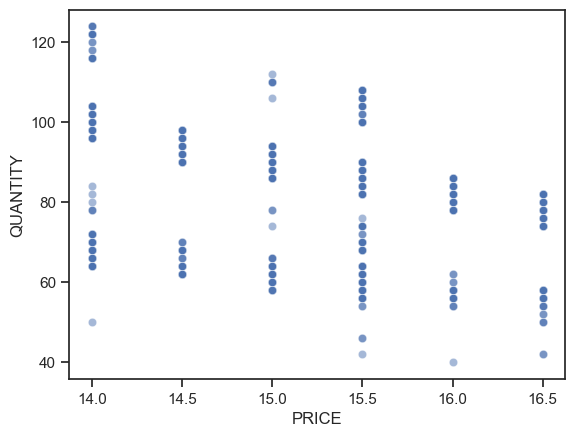

In [67]:
burger_1070 = combined_data[(combined_data['ITEM_NAME']=='BURGER') & (combined_data['SELL_ID'] == 1070)]

burger_1070.head()
burger_1070.describe()
sns.scatterplot(data=burger_1070, x=burger_1070.PRICE, y=burger_1070.QUANTITY, alpha=0.5)

## Modelling